<a href="https://colab.research.google.com/github/Siuumanth/Machine-Learning-and-other-notebooks/blob/main/Chatbot_test_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input,Embedding,LSTM,Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model

In [ ]:
nlp=spacy.load("en_core_web_sm")

the below json file is from the github repo

In [ ]:
with open("/content/intents (2).json") as f:
  data=json.load(f)



In [ ]:
type(data)

dict

In [ ]:
f=open("/content/intents (2).json")

data1=f.read()

FileNotFoundError: [Errno 2] No such file or directory: '/content/intents (1).json'

In [ ]:
data2 = {
   "intents": [
      {
         "tag": "greeting",
         "patterns": [
            "hi",
            "how are you?",
            "is anyone there?",
            "hello",
            "good day",
            "what's up",
            "how are ya",
            "heyy",
            "whatsup",
            "??? ??? ??",
            "hey",
            "how's it going?",
            "hey there",
            "yo",
            "hey buddy",
            "what's happening",
            "hey you",
            "howdy",
            "sup",
            "hey friend",
            "hello friend","sup","bro",
         ],
         "responses": [
            "hello!",
            "good to see you again!",
            "hi there, how can i help?",
            "hey, what's going on?",
            "hello, nice to meet you!",
            "hey there, how are you doing?",
            "hi! how's your day?",
            "hey, how's everything going?",
            "hello! what can i do for you?",
            "hey there, what's up?",
            "hi! how have you been?",
            "hey, long time no see!",
            "hello, how's your day been?",
            "hey, what's up buddy?",
            "hi! how's life treating you?",
            "hey there! how's everything?",
            "hi, what's happening?",
            "hey, nice to see you!",
            "hello! how are you today?",
            "hi there, how's your day going?",
            "hey buddy, what's new?"
         ],
         "context_set": ""
      },
      {
         "tag": "goodbye",
         "patterns": [
            "cya",
            "see you",
            "bye bye",
            "see you later",
            "goodbye",
            "i am leaving",
            "bye",
            "have a good day",
            "talk to you later",
            "ttyl",
            "i got to go",
            "gtg",
            "take care",
            "farewell",
            "later",
            "so long",
            "adios",
            "until next time",
            "catch you later",
            "see ya later",
            "see you soon"
         ],
         "responses": [
            "sad to see you go :(",
            "talk to you later",
            "goodbye!",
            "come back soon",
            "farewell, take care!",
            "see you next time!",
            "have a great day!",
            "until we meet again!",
            "goodbye, take care!",
            "see you later, alligator!",
            "bye for now!",
            "take it easy!",
            "see you soon!",
            "have a good one!",
            "safe travels!",
            "see you around!",
            "later, gator!",
            "catch you later!",
            "adios amigo!",
            "see you next time!",
            "see you soon!",
            "till we meet again!"
         ],
         "context_set": ""
      },
      {
         "tag": "creator",
         "patterns": [
            "what is the name of your developers",
            "what is the name of your creators",
            "what is the name of the developers",
            "what is the name of the creators",
            "who created you",
            "your developers",
            "your creators",
            "who are your developers",
            "developers",
            "you are made by",
            "you are made by whom",
            "who created you",
            "who create you",
            "creators",
            "who made you",
            "who designed you",
            "who programmed you",
            "your programmers",
            "who coded you",
            "who built you",
            "who developed you",
            "who engineered you",
            "who crafted you",
            "who constructed you"
        ],
        "responses": [
         "brilliant college students",
         "liquidmind engineering interns",
         "engineering college students who are interns for liquidmind",
         "people of liquidmind",
         "college folks",
         "the talented minds at LiquidMind",
         "students from LiquidMind",
         "interns at LiquidMind",
         "the creative minds behind LiquidMind",
         "the team at LiquidMind",
         "LiquidMind interns",
         "the brilliant minds at LiquidMind",
         "the engineering team at LiquidMind",
         "the developers at LiquidMind",
         "the creators at LiquidMind",
         "LiquidMind team members",
         "the creators behind LiquidMind",
         "the developers who work at LiquidMind"
     ],
         "context_set": ""
      },
      {
         "tag": "name",
         "patterns": [
            "name",
            "your name",
            "do you have a name",
            "what are you called",
            "what is your name",
            "what should i call you",
            "whats your name?",
            "what are you",
            "who are you",
            "who is this",
            "what am i chatting to",
            "who am i talking to",
            "what are you",
            "what's your identity",
            "identify yourself",
            "what should i refer to you as",
            "tell me about yourself"
        ]
        ,
        "responses": [
         "i'm a chatbot from liquidmind",
         "liquidmind chatbot",
         "i am a chatbot.",
         "i am your helper from liquidmind",
         "you're chatting with a liquidmind chatbot.",
         "i'm a digital assistant from liquidmind.",
         "i'm here to assist you as a chatbot.",
         "i am a virtual assistant from liquidmind.",
         "i'm the liquidmind chatbot here to help you.",
         "i am your digital assistant from liquidmind.",
         "i am a chatbot designed by liquidmind.",
         "i am an ai chatbot from liquidmind.",
         "you are chatting with liquidmind's chatbot.",
         "you're talking to a chatbot from liquidmind.",
         "you're talking to liquidmind's chatbot assistant."
     ]
     ,
         "context_set": ""
      },
      {
         "tag": "time",
         "patterns": [
            "how much time to process one invoice",
            "invoice extraction time",
            "response time of model",
            "how long does it take",
            "processing time for invoice",
            "how much time to get json file",
            "how long for json file",
            "wait time for data",
            "how much to wait for data",
            "json data how long to wait for",
            "what is the average time",
            "mean extraction time from invoices",
            "average data extraction time",
            "invoice processing latency",
            "how fast do i get a response",
            "how fast is the service",
            "speed of invoice service"
         ],
         "responses": [
            "It usually takes around 5-10 seconds to process one invoice."
         ],
         "context_set": ""
      },
      {
         "tag": "number",
         "patterns": [
            "more info",
            "contact info",
            "how to contact liquidmind",
            "liquidmind telephone number",
            "liquidmind number",
            "What is your contact no",
            "Contact number?",
            "how to call you",
            "company phone no?",
            "how can i contact your company",
            "Can i get your phone number",
            "how can i call you",
            "company phone number",
            "phone no",
            "call company steps"
         ],
         "responses": [
            "You can contact at: NUMBER\n Email: Email"
         ],
         "context_set": ""
      },
      {
         "tag": "service",
         "patterns": [
            "what do you do",
            "what is your usecase",
            "what do you provide",
            "services provided",
            "what are your functions",
            "what is your purpose",
            "how can you assist",
            "what can you offer",
            "what do you specialize in",
            "what are your capabilities",
            "what tasks can you perform",
            "what services do you offer",
            "what functionalities do you have",
            "what features do you possess",
            "what are your abilities",
            "what do you deliver",
            "what solutions do you provide",
            "how do you help",
            "what do you bring to the table"
         ],
         "responses": [
            "i'm a chatbot specialized in invoice extraction.",
            "i specialize in invoice extraction as a chatbot.",
            "my focus is on extracting invoices, I'm a chatbot.",
            "i'm here to assist with invoice extraction as a chatbot.",
            "invoice extraction is what I do best as a chatbot.",
            "as a chatbot, I'm dedicated to invoice extraction.",
            "i'm a chatbot designed for extracting invoices.",
            "my primary function is invoice extraction as a chatbot.",
            "i'm built for invoice extraction as a chatbot.",
            "Chatbot for invoice extraction, that's me.",
            "i'm all about invoice extraction as a chatbot.",
            "as a chatbot, my main task is invoice extraction.",
            "invoice extraction is my expertise as a chatbot.",
            "i'm a chatbot specializing in extracting invoices.",
            "my role is focused on invoice extraction as a chatbot.",
            "i'm here to help with invoice extraction, I'm a chatbot.",
            "as a chatbot, I'm here to handle invoice extraction.",
            "chatbot for invoice extraction purposes, that's me.",
            "invoice extraction is my area of expertise as a chatbot.",
            "i'm a chatbot designed specifically for invoice extraction."
         ],
         "context_set": ""
      },
      {
         "tag": "fees",
         "patterns": [
            "what is the charge of this service",
            "cost of this invoice extraction",
            "cost per invoice",
            "what are your charges",
            "price for this service",
            "how much does this service cost",
            "what is your fee",
            "rate for invoice extraction",
            "cost of using this service",
            "how much do i have to pay for this",
            "charge for invoice extraction",
            "what is the cost of this service",
            "what is your pricing",
            "cost per document",
            "cost of invoice extraction",
            "how much does it cost per invoice",
            "what's the fee for this",
            "what is the cost per invoice",
            "charge for this service",
            "what is the fee for invoice extraction"
         ],
         "responses": [
            "the cost for the service is cost.",
            "you'll be charged cost for this invoice extraction service.",
            "the cost per invoice extraction is cost.",
            "our service fee is cost per invoice.",
            "the charge for using this service is cost.",
            "the price for this service is cost.",
            "our fee for invoice extraction is cost.",
            "you can expect to pay cost for this service.",
            "the rate for invoice extraction is cost per document.",
            "the cost of using this service is cost.",
            "you'll be charged cost per document for this service.",
            "our pricing for this service is cost.",
            "the cost for invoice extraction is cost per document.",
            "it costs cost per invoice for this service.",
            "the fee for invoice extraction is cost per document.",
            "for this service, the charge is cost per document.",
            "the cost per invoice for this service is cost.",
            "our fee for this service is cost per invoice.",
            "the charge per invoice for this service is cost.",
            "for invoice extraction, the fee is cost per document."
         ],
         "context_set": ""
      },
      {
         "tag": "format",
         "patterns": [
            "how should i upload",
            "how to upload",
            "what is the format of uploading",
            "jpg or png or pdf",
            "invoice picture works",
            "do i upload image",
            "what format should i use",
            "acceptable file types",
            "how do i submit",
            "preferred file format",
            "upload instructions",
            "image upload guidelines",
            "acceptable image formats",
            "uploading requirements",
            "best way to upload",
            "what file types are accepted",
            "image upload format",
            "how do i send the invoice",
            "what type of files can i upload",
            "format for invoice image upload"
         ],
         "responses": [
            "take an image of the invoice in a well-lit room and upload the image preferably in jpg format.",
            "we recommend capturing the invoice image in jpg format in a well-lit environment for best results.",
            "please upload the invoice image, preferably in jpg format, ensuring good lighting for clarity.",
            "the preferred method is to upload an image of the invoice, preferably in jpg format.",
            "to upload the invoice, take a clear picture preferably in jpg format in a well-lit area.",
            "you can upload the invoice image, preferably in jpg format, for processing.",
            "the preferred format for uploading is jpg for the invoice image.",
            "for uploading, it's recommended to use jpg format for the invoice image.",
            "you can submit the invoice by uploading an image, preferably in jpg format.",
            "please upload the invoice image, preferably in jpg format, for processing.",
            "we suggest uploading the invoice image in jpg format for better processing.",
            "upload the invoice image, ensuring it's in jpg format and well-lit for clarity.",
            "the invoice image should be uploaded preferably in jpg format for processing.",
            "for best results, upload the invoice image in jpg format with good lighting.",
            "to upload the invoice, please provide an image preferably in jpg format.",
            "for uploading, we recommend submitting the invoice image in jpg format.",
            "the preferred format for uploading the invoice image is jpg.",
            "you can upload the invoice image in jpg format for processing.",
            "please upload the invoice image in jpg format for processing.",
            "it is advised to upload the invoice image preferably in jpg format."
         ],
         "context_set": ""
      },
      {
         "tag": "random",
         "patterns": [
            "I love you",
            "Will you marry me",
            "Do you love me"
         ],
         "responses": [
            "I am not program for this, please ask appropriate query"
         ],
         "context_set": ""
      },
      {
         "tag": "swear",
         "patterns": [
            "fuck",
            "bitch",
            "shut up",
            "hell",
            "stupid",
            "idiot",
            "dumb ass",
            "asshole",
            "fucker"
         ],
         "responses": [
            "please use appropriate language",
            "Maintaining decency would be appreciated"
         ],
         "context_set": ""
      }
   ]
}

DATA PREPERATION

In [ ]:
tags=[]
inputs=[]
responses={}
for intent in data['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [ ]:
responses

{'greeting': ['hello!',
  'good to see you again!',
  'hi there, how can i help?',
  "hey, what's going on?",
  'hello, nice to meet you!',
  'hey there, how are you doing?',
  "hi! how's your day?",
  "hey, how's everything going?",
  'hello! what can i do for you?',
  "hey there, what's up?",
  'hi! how have you been?',
  'hey, long time no see!',
  "hello, how's your day been?",
  "hey, what's up buddy?",
  "hi! how's life treating you?",
  "hey there! how's everything?",
  "hi, what's happening?",
  'hey, nice to see you!',
  'hello! how are you today?',
  "hi there, how's your day going?",
  "hey buddy, what's new?"],
 'goodbye': ['sad to see you go :(',
  'talk to you later',
  'goodbye!',
  'come back soon',
  'farewell, take care!',
  'see you next time!',
  'have a great day!',
  'until we meet again!',
  'goodbye, take care!',
  'see you later, alligator!',
  'bye for now!',
  'take it easy!',
  'see you soon!',
  'have a good one!',
  'safe travels!',
  'see you around!',
  

In [ ]:
inputs
tags

['greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'greeting',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'goodbye',
 'creator',
 'creator',
 'creator',
 'creator',
 'creator',
 'creator',
 'creator',
 'creator',
 'creator',
 'creator',
 'creator',
 'creator',
 'creator',
 'creator',
 'creator',
 'creator',
 'creator',
 'creator',
 'creator',
 'creator',
 'creator',
 'creator',
 'creator',
 'creator',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'name',
 'time',
 'time',
 'time',
 'time'

In [ ]:
data=pd.DataFrame({"inputs":inputs,"tags":tags})

In [ ]:
data

,inputs,tags
0,hi,greeting
1,how are you?,greeting
2,is anyone there?,greeting
3,hello,greeting
4,good day,greeting
...,...,...
181,stupid,swear
182,idiot,swear
183,dumb ass,swear
184,asshole,swear


In [ ]:
import string

#removing punctuations
data['inputs']=data['inputs'].apply(lambda word:[letters.lower() for letters in word if letters not in string.punctuation])  #word represents each element of inputs
#data['inputs']=data['inputs'].apply(lambda word:''.join(word))
data

,inputs,tags
0,"[h, i]",greeting
1,"[h, o, w, , a, r, e, , y, o, u]",greeting
2,"[i, s, , a, n, y, o, n, e, , t, h, e, r, e]",greeting
3,"[h, e, l, l, o]",greeting
4,"[g, o, o, d, , d, a, y]",greeting
...,...,...
181,"[s, t, u, p, i, d]",swear
182,"[i, d, i, o, t]",swear
183,"[d, u, m, b, , a, s, s]",swear
184,"[a, s, s, h, o, l, e]",swear


In [ ]:
data['inputs']=data['inputs'].apply(lambda word:''.join(word))
data

,inputs,tags
0,hi,greeting
1,how are you,greeting
2,is anyone there,greeting
3,hello,greeting
4,good day,greeting
...,...,...
181,stupid,swear
182,idiot,swear
183,dumb ass,swear
184,asshole,swear


data['inputs']: This selects the 'inputs' column from the DataFrame

 'data'.
.apply(...): This applies a function to each element of the selected column.

lambda word: ...: This defines an inline anonymous function (lambda function) that takes each element (word) of the 'inputs' column.
[letters.lower() for letters in word if letters not in string.punctuation]:

This is a list comprehension that iterates over each character (letters) in the word, converts it to lowercase using lower(), and includes it in the list only if it's not a punctuation character (checked using if letters not in string.punctuation).

data['inputs']: Selects the 'inputs' column from the DataFrame
 'data'.
.apply(...): Applies a function to each element of the selected column.

lambda word: ''.join(word): Defines a lambda function that takes each element (word, which is presumably a list of characters) and joins them together into a single string using join().

''.join(word): Joins all characters in the 'word' list together into a single string, with an empty string '' as the separator between characters.

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#tokenize data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train=tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train=pad_sequences(train)

#encoding outputs
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(data['tags'])

In [ ]:
input_shape=x_train.shape[1]
print(input_shape)

9


In [ ]:
print(x_train)
print(y_train)

[[  0   0   0 ...   0   0  81]
 [  0   0   0 ...   3  12   1]
 [  0   0   0 ...   5  82  57]
 ...
 [  0   0   0 ...   0 191 192]
 [  0   0   0 ...   0   0 193]
 [  0   0   0 ...   0   0 194]]
[ 4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  8  8  8  8  8
  8  8  8  8  8  8  8  8  8  8  8  8  8  8  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  7  7  7  9  9  9  9  9  9  9  9  9]


In [ ]:
#define vocabulary
vocabulary=len(tokenizer.word_index)
print("number of unique words :",vocabulary)
output_length=le.classes_.shape[0]
print("output length:",output_length)

number of unique words : 194
output length: 11


## NEURAL NETWORK

The network consists of an embedding layer which is one of the most powerful things in the field of NLP. The output of the embedding layer is the input of the recirrent layer with lstm gate. Then the output is flatteneed and a regular dense layer is used with a softmax activation function.

The main part is the embedding layer which gives corresponding vector for each main part in the dataset.

In [ ]:
#creating model

i=Input(shape=(input_shape,))
x=Embedding(vocabulary+1,10)(i)
x=LSTM(10,return_sequences=True)(x)
x=Flatten()(x)
x=Dense(output_length,activation='softmax')(x)
model=Model(i,x)

# OR

In [ ]:

model = tf.keras.Sequential([
    Embedding(input_dim=vocabulary+1, output_dim=10, input_length=input_shape),
    LSTM(10, return_sequences=True),
    Flatten(),
    Dense(output_length, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
#compiling
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
train=model.fit(x_train,y_train,epochs=200)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.0409 - loss: 2.3979    
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1077 - loss: 2.3915  
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1370 - loss: 2.3847 
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1276 - loss: 2.3765 
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1451 - loss: 2.3702 
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1253 - loss: 2.3608  
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1341 - loss: 2.3481 
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1483 - loss: 2.3262 
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1243 - loss: 2.3284 
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1623 - loss: 2.2814 
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1083 - loss: 2.2874 
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1477 

## Model Analysis



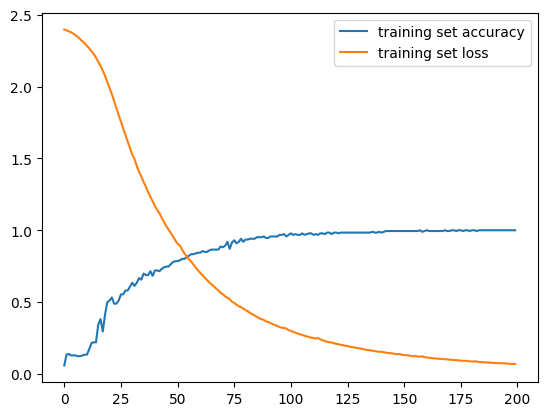

In [ ]:
#plotting model accuracy

plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

### Testing

In [ ]:

#chatting
import random

while True:
  texts_p=[]
  prediction_input=input('You : ')

  #removing punctuations and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and prediction
  response_tag=le.inverse_transform([output])[0]
  print("Bro : ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break



You : heyy james
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Bro :  hey, how's everything going?
You : sup
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Bro :  hey, long time no see!
You : what can you tell me about your company
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Bro :  Chatbot for invoice extraction, that's me.
You : what can you tell me about your creators
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Bro :  as a chatbot, my main task is invoice extraction.
You : who made you
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Bro :  liquidmind engineering interns
You : give me some contact infomatioon of your people
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Bro :  You can contact at: NUMBER
 Email: Email
You : bruh
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Bro :  hello! what can i do for you?
You : tell me about the process of invoice extraction
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Bro :  the cost of using this service is cost.
You : invoice extraction process
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Bro :  It usually takes